In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pp = pd.read_csv(r"Property_Price_Train.csv")

In [50]:
pp.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
pp.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [52]:
pp.isnull().sum()[pp.isnull().sum() > 0].count()

19

In [53]:
pp.isnull().sum()[pp.isnull().sum() > pp.shape[0] * .5]

Lane_Type                1368
Brick_Veneer_Type         871
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [54]:
pp.shape

(1459, 81)

In [55]:
1368 * 100 / 1459    # drop nulls which are greater than 50%

93.76285126799178

In [56]:
pp.drop("Brick_Veneer_Type", axis=1, inplace=True)
pp.drop("Fence_Quality", axis = 1, inplace = True)
pp.drop("Lane_Type", axis = 1, inplace = True)
pp.drop("Miscellaneous_Feature", axis = 1, inplace = True)
pp.drop("Pool_Quality", axis = 1, inplace = True)
pp.drop("Fireplace_Quality", axis = 1, inplace = True)
pp.drop("Id", axis=1, inplace = True)

In [57]:
pp.Lot_Extent.fillna(pp.Lot_Extent.mean(), inplace = True)
pp.Brick_Veneer_Area.fillna(pp.Brick_Veneer_Area.mean(), inplace = True)
pp.Basement_Height.fillna('TA', inplace = True)
pp.Basement_Condition.fillna('TA', inplace = True) 
pp.Exposure_Level.fillna('No', inplace = True)
pp.BsmtFinType1.fillna('Unf', inplace=True)
pp.BsmtFinType2.fillna('Unf', inplace = True)
pp.Electrical_System.fillna('SBrkr', inplace = True)
pp.Garage.fillna('Attchd', inplace=True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(), inplace=True)  
pp.Garage_Finish_Year.fillna('Unf', inplace=True) 
pp.Garage_Quality.fillna('TA', inplace=True) 
pp.Garage_Condition.fillna('TA', inplace = True)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pp[pp.select_dtypes(include = 'object').columns] = pp[pp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [59]:
len(pp.columns)

74

In [60]:
from sklearn.model_selection import train_test_split
pp_train, pp_test = train_test_split(pp, test_size = .25, random_state = 111) 

pp_train_x = pp_train.iloc[:, 0:74]
pp_train_y = pp_train.iloc[:, -1]

pp_test_x = pp_test.iloc[:, 0:74]
pp_test_y = pp_test.iloc[:, -1]

In [61]:
pp_train_x

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
1200,20,3,71.0,9353,1,3,3,0,4,0,...,163.283601,0,0,0,0,7,2006,7,0,116050
634,90,3,64.0,6979,1,3,3,0,4,0,...,1.691671,0,0,0,600,6,2010,8,4,144000
367,80,3,101.0,9150,1,0,3,0,0,0,...,10.455818,0,0,0,0,12,2008,8,4,165000
1439,60,3,80.0,11584,1,3,3,0,4,0,...,-23.849649,0,0,0,0,11,2007,8,4,197000
228,20,3,70.0,8521,1,3,3,0,2,0,...,106.053658,0,0,0,0,5,2010,8,4,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,50,2,55.0,4500,1,1,0,0,4,0,...,17.578066,0,0,0,0,7,2009,8,0,159434
1299,20,3,75.0,7500,1,3,3,0,4,0,...,-64.256450,0,0,0,0,5,2010,8,4,154000
86,60,3,122.0,11911,1,1,3,0,4,0,...,-70.424050,0,0,0,0,3,2009,8,4,174000
724,20,3,86.0,13286,1,0,3,0,4,0,...,-11.182180,0,0,0,0,2,2009,8,4,320000


In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(pp_train_x, pp_train_y)
Rsquare = linreg.score(pp_train_x, pp_train_y)
Rsquare


1.0

In [63]:
# Rsquare


In [64]:
N = pp_train_x.shape[0]
K = pp_train_x.shape[1]
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

1.0

In [65]:
linreg.intercept_

3.2014213502407074e-10

In [66]:
linreg.coef_

array([ 3.04010925e-13, -1.27045041e-11,  2.88241653e-13,  8.23993651e-17,
       -2.90238007e-11, -4.68640629e-13,  5.17787896e-12, -9.22751289e-11,
       -1.38968058e-12,  5.73375837e-12,  3.19202604e-13,  3.79014426e-13,
       -4.36635000e-12, -9.94206619e-12, -7.10319583e-12,  8.00170817e-12,
        1.96494803e-12, -3.37541139e-14, -1.80481986e-14, -1.49657448e-12,
        1.61787204e-11, -4.12752372e-13, -1.79122593e-13,  9.79175508e-15,
       -5.93086154e-12,  1.51355949e-12,  1.39899484e-12, -8.64709813e-13,
       -1.41255144e-12,  1.44016055e-13, -1.83520361e-13, -2.09992343e-15,
       -1.19288054e-12, -3.81530744e-16, -1.01041815e-14, -1.25872349e-14,
       -4.55052897e-12,  1.30219427e-13,  1.23680542e-12, -6.94324034e-13,
        1.30321101e-15,  4.26660660e-16, -6.11191870e-16,  1.11767691e-15,
       -5.39484922e-13,  5.07636802e-12,  1.51173190e-11,  7.82209457e-13,
       -2.03470765e-12, -3.08540704e-11, -4.75096382e-12,  2.98146094e-12,
       -1.24346361e-13, -

In [67]:
pred_train = linreg.predict(pp_train_x)
pred_train

array([116050., 144000., 165000., ..., 174000., 320000., 132250.])

In [68]:
err_train = pp_train_y - pred_train   #(actual - predicted)
err_train

1200   -1.455192e-11
634     5.820766e-11
367    -2.910383e-11
1439    0.000000e+00
228    -1.455192e-11
            ...     
681    -2.910383e-11
1299   -2.910383e-11
86     -2.910383e-11
724     0.000000e+00
876    -2.910383e-11
Name: Sale_Price, Length: 1094, dtype: float64

In [69]:
err_train.mean()

-2.1089635826851593e-11

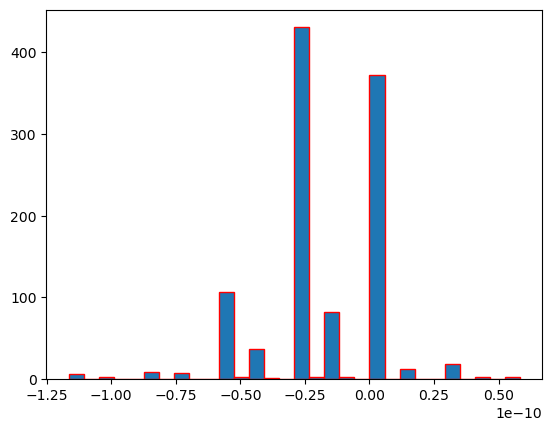

In [70]:
import matplotlib.pyplot as plt

plt.hist(err_train, bins = 30, edgecolor = 'red')
plt.show()

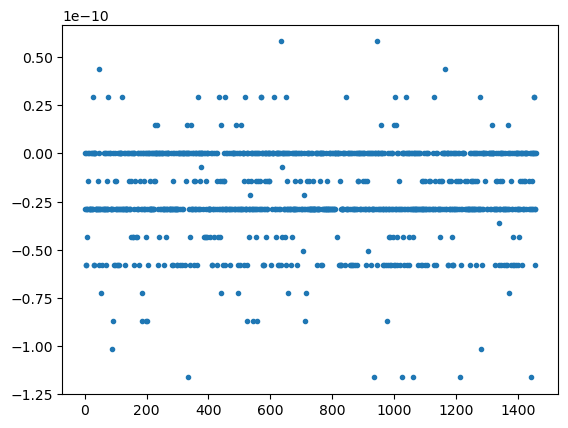

In [71]:
plt.plot(err_train,'.')

<Axes: ylabel='Sale_Price'>

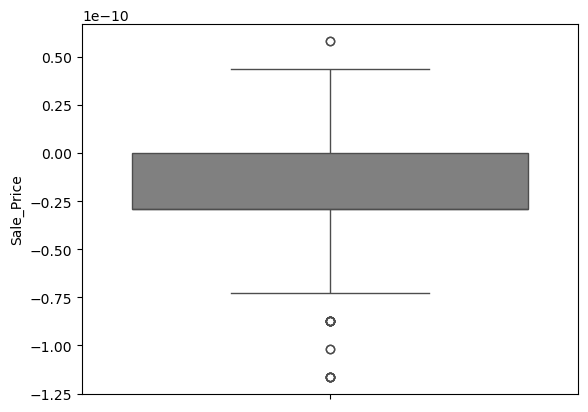

In [72]:
sns.boxplot(err_train, color='grey')

In [73]:
actual_pred = pd.DataFrame()
actual_pred["Actual"] = pp_train_y
actual_pred["Predicted"] = pred_train

In [74]:
actual_pred

,Actual,Predicted
1200,116050,116050.0
634,144000,144000.0
367,165000,165000.0
1439,197000,197000.0
228,125000,125000.0
...,...,...
681,159434,159434.0
1299,154000,154000.0
86,174000,174000.0
724,320000,320000.0


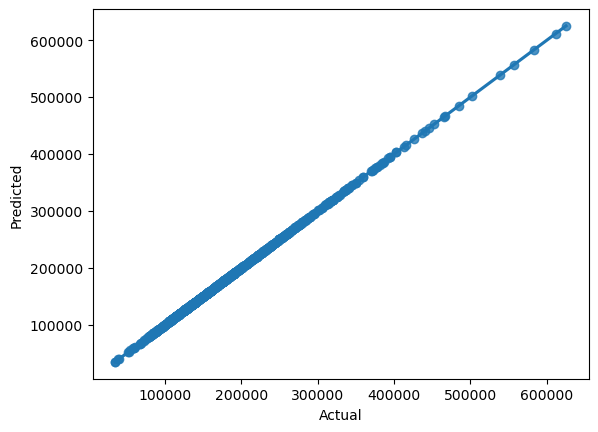

In [75]:
sns.regplot(x = "Actual", y = "Predicted", data = actual_pred)
plt.show()

In [76]:
#MSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(pp_train_y, pred_train)
mse_train

9.681551745724855e-22

In [77]:
rmse_train = np.sqrt(mse_train)
rmse_train

3.1115192022105305e-11

In [78]:
# Mape
np.mean(np.abs(err_train * 100/ pp_train_y))

1.5995292508141332e-14

In [79]:
# Evaluate our model on test

pred_test = linreg.predict(pp_test_x)
err_test = pp_test_y - pred_test

In [80]:
#mean_absolute_percentage_error(pp_test_y, pred_test) * 100

In [81]:
100 - 12.14

87.86

In [82]:
# any model
#1 aim : as good posssible(Rsquare, ad, mape, mse)
#2 stable as possible
#3 build the model using as less variables as possible withou compromising much on the model


# Feature Importance
-building the model using the significant Features
-Feature Selection

In [113]:
pp = pd.read_csv(r"Property_Price_Train.csv")
pp.isnull().sum()[pp.isnull().sum() > pp.shape[0] * .5]


pp.drop("Brick_Veneer_Type", axis=1, inplace=True)
pp.drop("Fence_Quality", axis = 1, inplace = True)
pp.drop("Lane_Type", axis = 1, inplace = True)
pp.drop("Miscellaneous_Feature", axis = 1, inplace = True)
pp.drop("Pool_Quality", axis = 1, inplace = True)
pp.drop("Fireplace_Quality", axis = 1, inplace = True)
pp.drop("Id", axis=1, inplace = True)

pp.Lot_Extent.fillna(pp.Lot_Extent.mean(), inplace = True)
pp.Brick_Veneer_Area.fillna(pp.Brick_Veneer_Area.mean(), inplace = True)
pp.Basement_Height.fillna('TA', inplace = True)
pp.Basement_Condition.fillna('TA', inplace = True) 
pp.Exposure_Level.fillna('No', inplace = True)
pp.BsmtFinType1.fillna('Unf', inplace=True)
pp.BsmtFinType2.fillna('Unf', inplace = True)
pp.Electrical_System.fillna('SBrkr', inplace = True)
pp.Garage.fillna('Attchd', inplace=True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(), inplace=True)  
pp.Garage_Finish_Year.fillna('Unf', inplace=True) 
pp.Garage_Quality.fillna('TA', inplace=True) 
pp.Garage_Condition.fillna('TA', inplace = True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pp[pp.select_dtypes(include = 'object').columns] = pp[pp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [115]:
pp_x = pp.iloc[:, 0:-1]
corr_list = []
for col in pp_x.columns:
    corr_list.append(pp.Sale_Price.corr(pp_x[col]))

In [117]:
len(corr_list)

73

In [119]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = pp_x.columns
feat_imp['Corr'] = corr_list
feat_imp

,Features,Corr
0,Building_Class,-0.084563
1,Zoning_Class,-0.166896
2,Lot_Extent,0.334992
3,Lot_Size,0.263843
4,Road_Type,0.041057
...,...,...
68,Miscellaneous_Value,-0.021216
69,Month_Sold,0.046401
70,Year_Sold,-0.028884
71,Sale_Type,-0.054826


In [88]:
# lets select only those col which have high corelation with target variables

In [121]:
feat_imp[(feat_imp.Corr > 0.2) | (feat_imp.Corr < -0.2)].shape

(34, 2)

In [123]:
l1 = list(feat_imp[(feat_imp.Corr > 0.1) | (feat_imp.Corr < -0.1)].Features)

In [125]:
l1.append('Sale_Price')

In [127]:
pp = pp.loc[:, l1]

In [129]:
pp.head()

,Zoning_Class,Lot_Extent,Lot_Size,Property_Shape,Neighborhood,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,...,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Condition,Pavedd_Drive,Screen_Lobby_Area,Sale_Condition,Sale_Price
0,3,65.0,8450,3,5,5,7,2003,2003,1,...,0,2,2003.0,1,2,4,2,0,4,208500
1,3,80.0,9600,3,24,2,6,1976,1976,1,...,1,2,1976.0,1,2,4,2,0,4,181500
2,3,68.0,11250,0,5,5,7,2001,2002,1,...,1,2,2001.0,1,2,4,2,0,4,223500
3,3,60.0,9550,0,6,5,7,1915,1970,1,...,1,6,1998.0,2,3,4,2,0,0,140000
4,3,84.0,14260,0,15,5,8,2000,2000,1,...,1,2,2000.0,1,3,4,2,0,4,250000


In [155]:
pp = df1

In [157]:
from sklearn.model_selection import train_test_split
pp_train, pp_test = train_test_split(pp, test_size = .25, random_state = 111) 

pp_train_x = pp_train.iloc[:, 0:-1]
pp_train_y = pp_train.iloc[:, -1]

pp_test_x = pp_test.iloc[:, 0:-1]
pp_test_y = pp_test.iloc[:, -1]

In [158]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(pp_train_x, pp_train_y)
Rsquare = linreg.score(pp_train_x, pp_train_y)
Rsquare


0.8347088370357758

In [159]:
N = pp_train_x.shape[0]
K = pp_train_x.shape[1]
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

0.8272781653740474

In [160]:
# Feature Importance

In [161]:
pred_train_pp = linreg.predict(pp_train_x)
pred_train_pp

array([131544.76287292, 128681.76768074, 166334.21225868, ...,
       112878.03368405, 265783.22370122, 206203.575613  ])

In [163]:
err_train_pp = pp_train_y - pred_train_pp   #(actual - predicted)
err_train_pp

1192    -6544.762873
116     10318.232319
962    -11334.212259
907     32337.629967
501     19411.534133
            ...     
721    -17049.290554
1358      735.907152
89      10721.966316
764      4216.776299
923    -13203.575613
Name: Sale_Price, Length: 1047, dtype: float64

In [164]:
err_train_pp.mean()

9.767990470387988e-11

In [165]:
np.mean(np.square(err_train_pp))

571224220.8602464

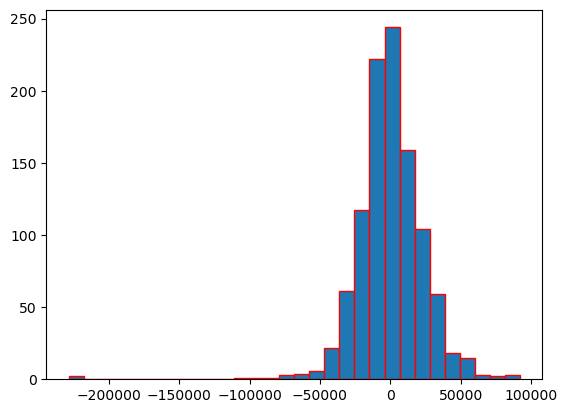

In [166]:
plt.hist(err_train_pp, bins = 30, edgecolor = 'red')
plt.show()

In [167]:
actual_pred = pd.DataFrame()
actual_pred["Actual"] = pp_train_y
actual_pred["Predicted"] = pred_train_pp

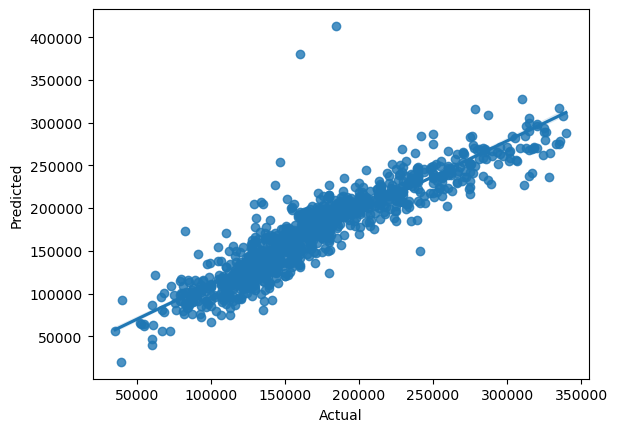

In [168]:
sns.regplot(x = "Actual", y = "Predicted", data = actual_pred)
plt.show()

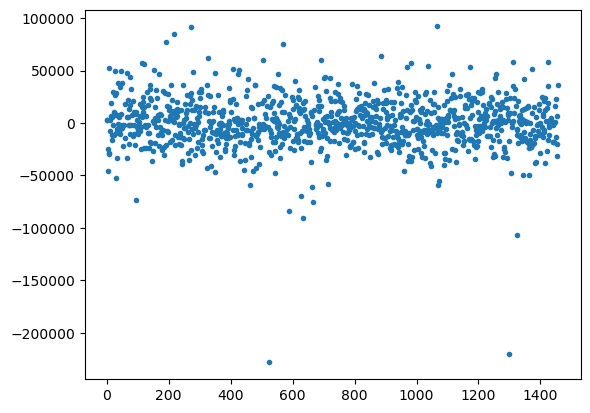

In [169]:
plt.plot(err_train_pp,'.')

In [170]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]  # No need for a semicolon
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)]
    
    print(df1.shape)
    print("Number of outliers removed =>", df.shape[0] - df1.shape[0])  # Corrected print statement


In [171]:
# outliers are removed from target variable
# or remove from whole data


In [173]:
remove_outliers(pp, 'Sale_Price', 2)


(1326, 46)
Number of outliers removed => 70
